Some useful facts: there are 1442 frames, each frame has dimensions of 1920 (width) by 1080 (height), and there are 36 ants, with 4 additional objects that seem to be either some kind of food or dead ants/animals.

# Tests

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display

## Finding Order Parameter for a Single Frame

### Find Ants and Direction Vectors/Angles in an Individual Frame

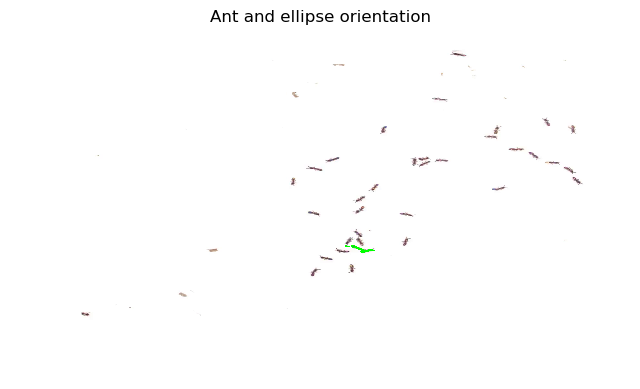

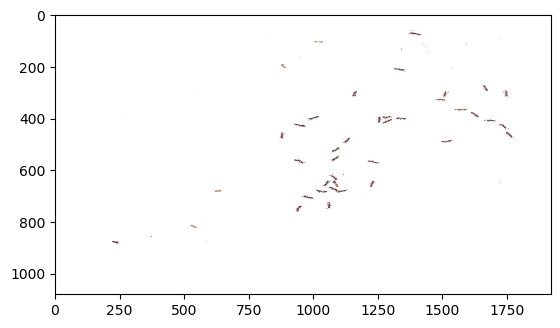

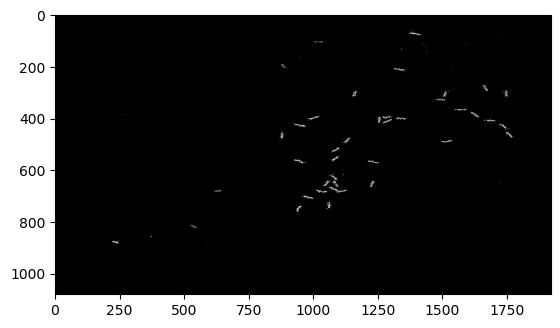

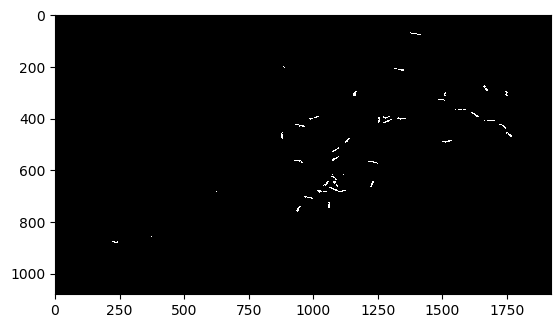

In [8]:
# Open the video file
video_file = 'xavier_disordered_response_to_temp_perturbation.mp4'
cap = cv2.VideoCapture(video_file)

if not cap.isOpened():
    print("Error opening video file")

# Initialize lists to store data over time
mean_distances = []
variances = []
# Set minimum and maximum contour areas to filter ants
min_contour_area = 150  # Adjust this value based on your needs
#max_contour_area = 5000  # Adjust this value based on your needs
frame_num=0

######## access a particular frame ##############
# Frame number to retrieve (in your case, the 23rd frame)
frame_number = 0

# Initialize a frame counter
current_frame = 0

while True:
    # Read a frame from the video
    ret, frame = cap.read()

    # Break the loop if we've reached the end of the video or the desired frame
    if not ret or current_frame == frame_number:
        break

    # Increment the frame counter
    current_frame += 1
########################################################

res = 1
# Determine size of frame regions.
height, width, ch = frame.shape
roi_height = int(height / res)
roi_width = int(width / res)

# Convert the frame to grayscale for contour detection
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
inverted_gray = 255-gray
_, thresholded = cv2.threshold(inverted_gray, 96, 255, cv2.THRESH_BINARY)
fragment = thresholded[0*roi_height:(0+1)*roi_height, 0*roi_width:(0+1)*roi_width]

# Find contours in the grayscale frame
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours and centroids on the original frame
frame_with_contours = frame.copy()

angles = []
centroids = []

areas = []
for contour in contours:
    # Calculate the area of each contour
    contour_area = cv2.contourArea(contour)

    # Check if the contour area is within the specified range
    if min_contour_area <= contour_area:
        # areas.append(contour_area)

        # Calculate the centroid of the contour
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
        else:
            cX, cY = 0, 0
        centroids.append([cX,cY])

        # Calculate the orientation angle of the ant (major axis)
        _, _, angle = cv2.fitEllipse(contour)
        angles.append(angle)

        # Convert the angle from degrees to radians
        angle_rad = np.deg2rad(angle)

        # Calculate the endpoint of the arrow based on the orientation
        arrow_length = 50  # Length of the arrow
        endpoint_x = int(cX - arrow_length * np.sin(angle_rad))
        endpoint_y = int(cY + arrow_length * np.cos(angle_rad))  # Negative sin because of image coordinates

        # Draw the arrow from centroid to endpoint
        cv2.arrowedLine(frame_with_contours, (cX, cY), (endpoint_x, endpoint_y), (0, 255, 0), 2)

        # # Draw the contour and centroid on the frame
        cv2.drawContours(frame_with_contours, [contour], 0, (0, 255, 0), 2)  # Green contour
        # cv2.circle(frame_with_contours, (cX, cY), 5, (0, 0, 255), -1)  # Red centroid

# Display the frame with contours and centroids
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(frame_with_contours, cv2.COLOR_BGR2RGB))
plt.title('Ant and ellipse orientation')
plt.axis('off')
plt.show()

plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(inverted_gray, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(thresholded, cv2.COLOR_BGR2RGB))
plt.show()

### Testing Fragments Work as Expected

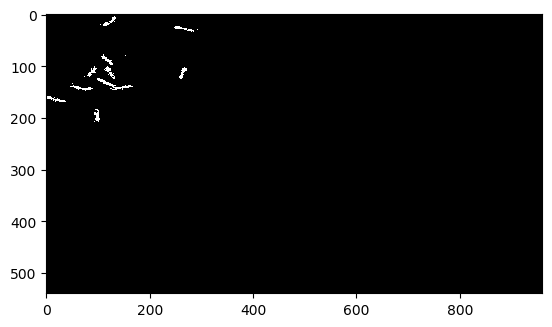

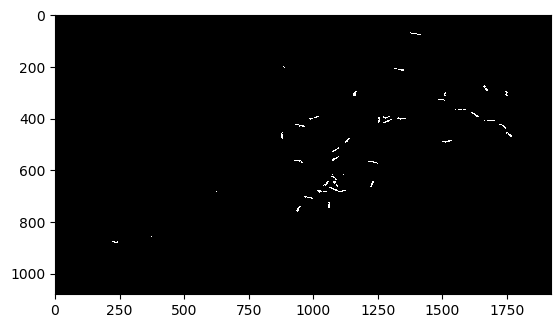

In [4]:
res = 2
height, width = 1080, 1920
roi_height = int(1080 / res)
roi_width = int(1920 / res)
x = 1
y = 1
fragment_test = thresholded[x*roi_height:(x+1)*roi_height, y*roi_width:(y+1)*roi_width]
plt.imshow(cv2.cvtColor(fragment_test, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(thresholded, cv2.COLOR_BGR2RGB))
plt.show()

### Tune Parameters for Ant Detection

In [5]:
# Code to tune parameters on minimum contour area and thresholding.

# Open the video file
video_file = 'xavier_disordered_response_to_temp_perturbation.mp4'
cap = cv2.VideoCapture(video_file)
if not cap.isOpened():
    print("Error opening video file")

num_ants = []    
while True:
    # Set minimum and maximum contour areas to filter ants
    min_contour_area = 30  # Adjust this value based on your needs
    
    # Read a frame from the video
    ret, frame = cap.read()

    # Break the loop if we've reached the end of the video or the desired frame
    if not ret or frame_num > 1442:
        break

    # Convert the frame to grayscale for contour detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    inverted_gray = 255-gray
    _, thresholded = cv2.threshold(inverted_gray, 96, 255, cv2.THRESH_BINARY)

    # Find contours in the grayscale frame
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    areas = []
    for contour in contours:
        # Calculate the area of each contour
        contour_area = cv2.contourArea(contour)

        # Check if the contour area is within the specified range
        if min_contour_area <= contour_area:
            areas.append(contour_area)
    num_ants.append(len(areas))
    
print(min(num_ants),max(num_ants),np.mean(num_ants))
print(num_ants)

28 40 35.67036780013879
[35, 36, 37, 31, 35, 34, 32, 34, 35, 34, 35, 32, 33, 32, 33, 33, 36, 35, 35, 37, 35, 36, 37, 37, 36, 36, 35, 34, 32, 34, 36, 31, 34, 36, 37, 36, 36, 36, 38, 32, 35, 36, 34, 37, 33, 35, 35, 39, 37, 37, 38, 33, 36, 35, 36, 34, 34, 34, 38, 37, 36, 35, 37, 35, 33, 32, 36, 35, 34, 35, 35, 33, 35, 34, 35, 35, 33, 35, 33, 34, 34, 32, 36, 38, 34, 32, 34, 32, 37, 34, 37, 38, 36, 35, 36, 34, 34, 35, 36, 35, 33, 34, 33, 36, 36, 34, 34, 37, 36, 33, 35, 36, 34, 34, 33, 33, 35, 32, 35, 30, 34, 34, 32, 34, 35, 33, 34, 35, 36, 35, 36, 35, 35, 35, 34, 36, 35, 32, 34, 34, 36, 36, 36, 38, 36, 36, 34, 36, 36, 36, 36, 33, 36, 34, 34, 33, 33, 33, 36, 36, 36, 36, 34, 35, 35, 34, 35, 34, 34, 35, 36, 35, 36, 35, 37, 36, 35, 36, 36, 37, 36, 36, 37, 35, 37, 36, 35, 37, 36, 36, 36, 35, 35, 37, 37, 36, 36, 36, 34, 34, 31, 34, 33, 34, 34, 35, 34, 34, 34, 35, 36, 36, 37, 36, 35, 34, 35, 36, 35, 35, 36, 36, 36, 37, 36, 36, 36, 36, 37, 36, 35, 37, 36, 36, 37, 35, 37, 36, 36, 37, 34, 32, 34, 36,

With tests run above, it seems that an optimal combination of parameters to identify the ants is to use a minimum contour area of 30 and to use a thresholded image with a grayscale cutoff of 96.

### Calculate Order Parameter for Frame

In [6]:
angles_rad = np.deg2rad(angles)
# Convert angles to unit vectors
unit_vectors = [(np.cos(angle), np.sin(angle)) for angle in angles_rad]

# Calculate the nematic director (average unit vector)
nematic_director = np.mean(unit_vectors, axis=0)

# Calculate the nematic order parameter
cosines = [np.dot(vector, nematic_director) for vector in unit_vectors]
cosines_squared_minus_1 = [(3*(cosine**2) - 1) for cosine in cosines]
nematic_order_parameter = 0.5 * np.mean(cosines_squared_minus_1)

# Calculate the nematic order parameter
# nematic_order_parameter = 2 * np.linalg.norm(nematic_director) / len(angles)

print(nematic_order_parameter)

1.0000000000000007


## Testing Direction Fitting with Ellipses

10 136.5
Angle: 274.77º


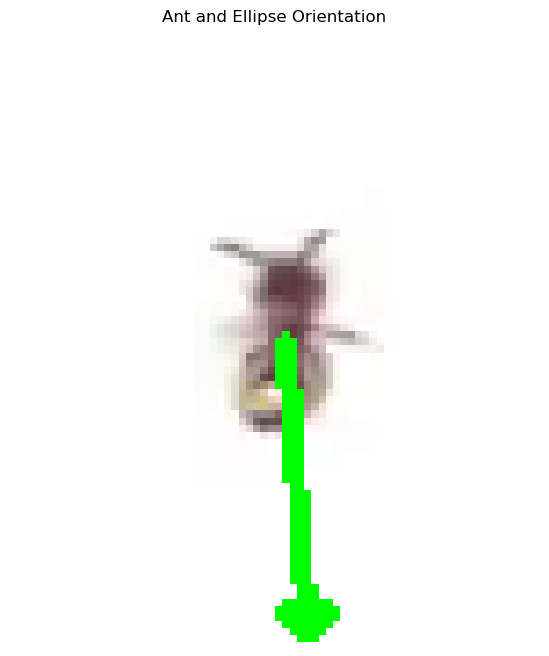

In [15]:
# test individual contour ellipse fit
frame_test = frame.copy()
min_contour_area = 50

contour_num = 0
contour = contours[contour_num]
contour_area = cv2.contourArea(contour)

while min_contour_area > contour_area or contour_num in [1,9]: #1,9,10,13,21
    contour_num += 1
    contour = contours[contour_num]
    contour_area = cv2.contourArea(contour)

print(contour_num, contour_area)

M = cv2.moments(contour)
if M["m00"] != 0:
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
else:
    cX, cY = 0, 0

# Calculate the orientation angle of the ant (major axis)
ellipse = cv2.fitEllipse(contour)
angle = ellipse[2]
print(f'Angle: {(round(angle,2)+270)%360}º')

# Calculate the endpoint of the arrow based on the orientation
angle_rad = np.deg2rad(angle)
arrow_length = 40  # Length of the arrow
endpoint_x = int(cX + arrow_length * np.sin(angle_rad))
endpoint_y = int(cY - arrow_length * np.cos(angle_rad))  # Negative sin because of image coordinates

# Draw the arrow from centroid to endpoint
cv2.arrowedLine(frame_test, (cX, cY), (endpoint_x, endpoint_y), (0, 255, 0), 2)

# # Draw the ellipse, contour, and centroid on the frame.
# ellipse_image = cv2.ellipse(frame_test, ellipse, (0, 255, 0), 2) # Green ellipse
# cv2.drawContours(frame_test, [contour], 0, (255, 0, 0), 2)  # Green contour
# cv2.circle(frame_with_contours, (cX, cY), 5, (0, 0, 255), -1)  # Red centroid

# Display the frame
frame_cropped = frame_test
#frame_test[int(min(contour[:,:,0])-30):int(max(contour[:,:,0])+30), int(min(contour[:,:,1])-30):int(max(contour[:,:,1])+30)] 
#frame_test[x*roi_height:(x+1)*roi_height, y*roi_width:(y+1)*roi_width]
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(frame_test, cv2.COLOR_BGR2RGB))
plt.title('Ant and Ellipse Orientation')
plt.axis('off')
#     plt.xlim(0,1920)
#     plt.ylim(0,1080)
plt.xlim(min(contour[:,:,0])-30,max(contour[:,:,0])+30)
plt.ylim(min(contour[:,:,1])-30,max(contour[:,:,1])+30)
plt.show()

***

# Functions to Calculate Order Parameters

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_polar_order(angles):    
    # Convert angles to radians.
    angles_rad = np.deg2rad(angles)
    
    # Convert angles to unit vectors.
    unit_vectors = [(np.cos(angle), np.sin(angle)) for angle in angles_rad]

    # Calculate the director (average unit vector).
    director = np.mean(unit_vectors, axis=0)

    # Calculate the nematic order parameter
    cosines = [np.dot(vector, director) for vector in unit_vectors]
    polar_order_parameter = (1/len(cosines))*np.sum([c/(2*np.pi) for c in cosines])

    return polar_order_parameter

def calculate_nematic_order(angles):
    # Convert angles to radians.
    angles_rad = np.deg2rad(angles)
    
    # Convert angles to unit vectors.
    unit_vectors = [(np.cos(angle), np.sin(angle)) for angle in angles_rad]

    # Calculate the director (average unit vector).
    director = np.mean(unit_vectors, axis=0)

    # Calculate the nematic order parameter
    cosines = [np.dot(vector, director) for vector in unit_vectors]
    two_times_cosines_squared_minus_1 = [(2*(cosine**2) - 1) for cosine in cosines]
    nematic_order_parameter = (1/len(two_times_cosines_squared_minus_1))*np.sum([c/(2*np.pi) for c in cosines_squared_minus_1])

    return nematic_order_parameter

def get_direction_order(video_file,par="polar",res=1):
    # Check user inputs.
    if res < 1:
        print("Invalid resolution. Must be a positive intenger.")
        return 0
    res = int(res)
    if par != "polar" and par != "nematic":
        print("Invalid parameter type. Must be polar or nematic.")
        return 0
    
    # Open the video file
    cap = cv2.VideoCapture(video_file)
    if not cap.isOpened():
        print("Error opening video file")
        return 0

    # Initialize lists to store data over time
    order_parameters=[]
    
    # Set minimum and maximum contour areas to filter ants
    min_contour_area = 30  # Adjust this value based on your needs
    
    # Iterate through all video frames.
    while True:
        # Read a frame from the video, and break if we've reached the end.
        ret, frame = cap.read()
        if not ret:
            break
        
        # Determine size of frame regions.
        height, width, ch = frame.shape
        roi_height = int(height / res)
        roi_width = int(width / res)

        # Convert the frame to grayscale for contour detection
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        inverted_gray = 255-gray
        _, thresholded = cv2.threshold(inverted_gray, 96, 255, cv2.THRESH_BINARY)
        
        order_parameter = 0
        num_regions = 0
        # Calculate the order parameter in each segment of a frame.
        for x in range(res):
            for y in range(res):
                # Find contours in the relevant segment of the grayscale frame.
                fragment = thresholded[y*roi_height:(y+1)*roi_height, x*roi_width:(x+1)*roi_width]
                contours, _ = cv2.findContours(fragment, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

                angles = []
                for contour in contours:
                    # Calculate the area of each contour
                    contour_area = cv2.contourArea(contour)
                    
                    # Check if the contour area is within the specified range
                    if (len(contour) < 5):
                        continue
                        
                    # Calculate ant's direction angle.
                    _, _, angle = cv2.fitEllipse(contour)
                    angles.append(angle)
                
                # If there are no ants in region, go to next one.
                if len(angles) == 0:
                    continue
                
                num_regions += 1
                if par == "polar":
                    order_parameter += calculate_polar_order(angles)
                else:
                    order_parameter += calculate_nematic_order(angles)
        
        if num_regions == 0:
            continue
            
        avg_order = order_parameter/num_regions
        order_parameters.append(avg_order)

    # Release the video capture
    cap.release()

    # Create a time array (frame index) for the x-axis
    time = np.arange(len(order_parameters))
    return time, order_parameters

# Function to smooth out raw data for plotting.
def smooth(time,data,window_size):
    data_s = np.convolve(data, np.ones(window_size)/window_size, mode='valid')
    time_s = time[(window_size-1)//2 : -(window_size-1)//2]
    return time_s,data_s

*****

# Testing Code on Videos

## Disordered vs Ordered Response Videos

In [8]:
d_video_file = 'xavier_disordered_response_to_temp_perturbation.mp4'
d_t_p,d_polar = get_direction_order(d_video_file,par="polar",res=1)
d_t_n,d_nematic = get_direction_order(d_video_file,par="nematic",res=1)

o_video_file = 'xavier_ordered_response_to_temp_perturbation.mp4'
o_t_p,o_polar = get_direction_order(o_video_file,par="polar",res=1)
o_t_n,o_nematic = get_direction_order(o_video_file,par="nematic",res=1)

### Polar Order

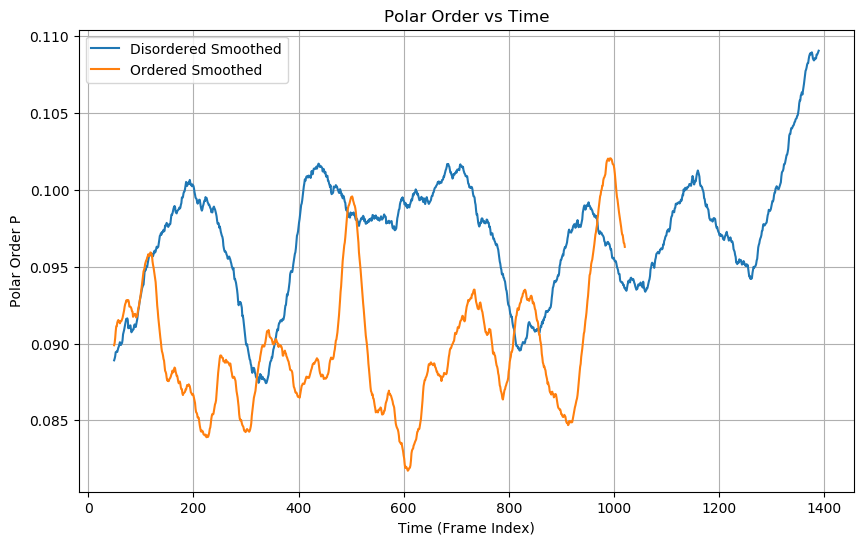

In [11]:
# Set the window size for the moving average
window_size = 100  # Adjust this based on your preference

# Calculate the moving average without end effects using NumPy
[d_t_p_s,d_polar_s] = smooth(d_t_p,d_polar,window_size)
[o_t_p_s,o_polar_s] = smooth(o_t_p,o_polar,window_size)


# Plot data.
plt.figure(figsize=(10, 6))
# plt.plot(d_t,d_polar, label='Disordered')
# plt.plot(o_t,o_polar,label='Ordered')
plt.plot(d_t_p_s, d_polar_s, label=f'Disordered Smoothed', linestyle='-')
plt.plot(o_t_p_s, o_polar_s, label=f'Ordered Smoothed', linestyle='-')

# Style plot.
plt.xlabel('Time (Frame Index)')
plt.ylabel('Polar Order P')
plt.title('Polar Order vs Time')
plt.legend()
plt.grid(True)
# plt.ylim([0.5,1])
plt.show()

### Nematic Order

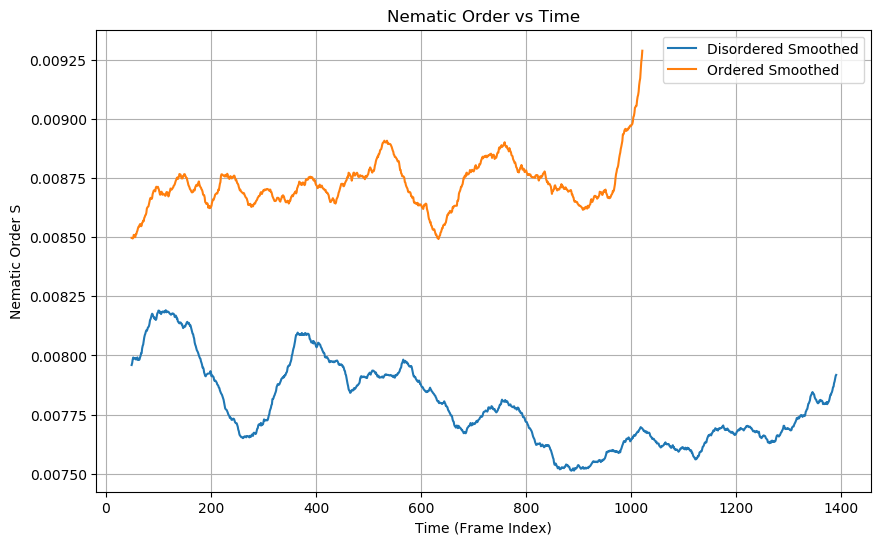

In [12]:
# Set the window size for the moving average
window_size = 100  # Adjust this based on your preference
# Calculate the moving average without end effects using NumPy
[o_t_n_s,o_nematic_s] = smooth(o_t_n,o_nematic,window_size)
[d_t_n_s,d_nematic_s] = smooth(d_t_n,d_nematic,window_size)


# Plot variance over mean distance as a function of time
plt.figure(figsize=(10, 6))
# plt.plot(d_t,d_nematic, label='Disordered')
# plt.plot(o_t,o_nematic,label='Ordered')
plt.plot(d_t_n_s, d_nematic_s, label=f'Disordered Smoothed', linestyle='-')
plt.plot(o_t_n_s, o_nematic_s, label=f'Ordered Smoothed', linestyle='-')

# Style plot.
plt.xlabel('Time (Frame Index)')
plt.ylabel('Nematic Order S')
plt.title('Nematic Order vs Time')
plt.legend()
plt.grid(True)
# plt.ylim([0.5,1])
plt.show()

***

## PNAS Videos

In [125]:
sm01_video_file = 'xavier_pnas_sm01_crop.mp4'
sm01_t_p,sm01_polar = get_direction_order(sm01_video_file,par="polar",res=1)
sm01_t_n,sm01_nematic = get_direction_order(sm01_video_file,par="nematic",res=1)

sm02_video_file = 'xavier_pnas_sm02_crop.mp4'
sm02_t_p,sm02_polar = get_direction_order(sm02_video_file,par="polar",res=1)
sm02_t_n,sm02_nematic = get_direction_order(sm02_video_file,par="nematic",res=1)

### Polar Order

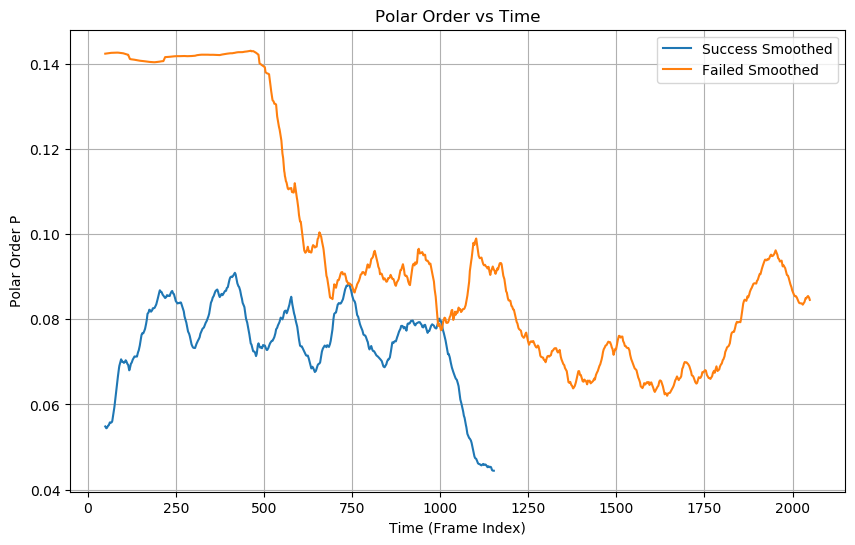

In [126]:
# Set the window size for the moving average
window_size = 100  # Adjust this based on your preference

# Calculate the moving average without end effects using NumPy
[sm01_t_p_s,sm01_polar_s] = smooth(sm01_t_p,sm01_polar,window_size)
[sm02_t_p_s,sm02_polar_s] = smooth(sm02_t_p,sm02_polar,window_size)

# Plot variance over mean distance as a function of time
plt.figure(figsize=(10, 6))
# plt.plot(sm01_t_p,sm01_polar, label='Disordered')
# plt.plot(sm02_t_p,sm02_polar, label='Ordered')
plt.plot(sm01_t_p_s, sm01_polar_s, label=f'Success Smoothed', linestyle='-')
plt.plot(sm02_t_p_s, sm02_polar_s, label=f'Failed Smoothed', linestyle='-')

# Style plot.
plt.xlabel('Time (Frame Index)')
plt.ylabel('Polar Order P')
plt.title('Polar Order vs Time')
plt.legend()
plt.grid(True)
# plt.ylim([0.5,1])
plt.show()

### Nematic Order

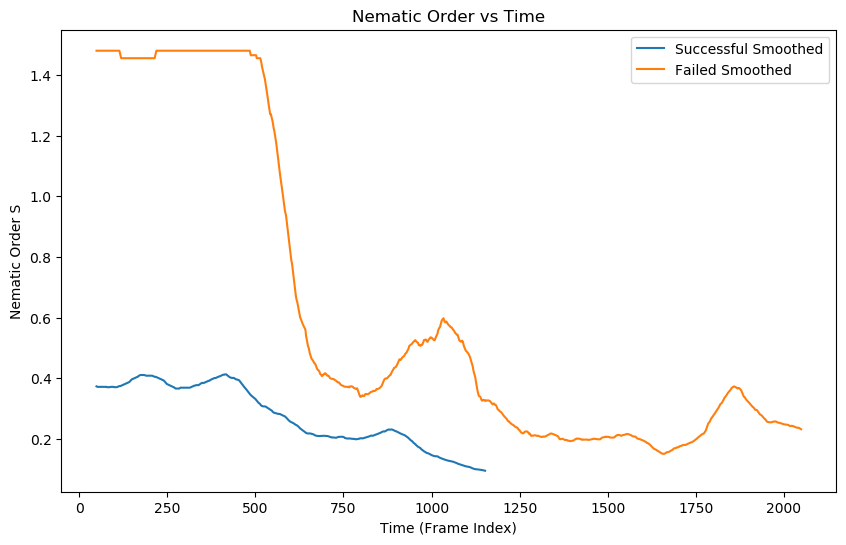

In [127]:
# Set the window size for the moving average
window_size = 100  # Adjust this based on your preference
# Calculate the moving average without end effects using NumPy
[sm01_t_n_s,sm01_nematic_s] = smooth(sm01_t_n,sm01_nematic,window_size)
[sm02_t_n_s,sm02_nematic_s] = smooth(sm02_t_n,sm02_nematic,window_size)

# Plot variance over mean distance as a function of time
plt.figure(figsize=(10, 6))
# plt.plot(sm01_t_n,sm01_nematic, label='Disordered')
# plt.plot(sm02_t_n,sm02_nematic,label='Ordered')
plt.plot(sm01_t_n_s, sm01_nematic_s, label=f'Successful Smoothed', linestyle='-')
plt.plot(sm02_t_n_s, sm02_nematic_s, label=f'Failed Smoothed', linestyle='-')

# Style plot.
plt.xlabel('Time (Frame Index)')
plt.ylabel('Nematic Order S')
plt.title('Nematic Order vs Time')
plt.legend()
plt.grid(False)
# plt.ylim([0.5,1])
plt.show()

# END